In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d0f6e60819f9a5a.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccf708985967f09.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccbc2c5d1aaf078.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bdcc23296db1516.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9cb97f87870407f0.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bf9cca507923334.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9c077ad23a231abb.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d6a6499354e3197.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9c3f1c10ba54ed56.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d6acb154f9932c8.jpg
/kaggle/in

In [7]:
import os

# Check the structure of the input folder
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input
/kaggle/input/plant-disease-recognition-dataset
/kaggle/input/plant-disease-recognition-dataset/Validation
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d0f6e60819f9a5a.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccf708985967f09.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccbc2c5d1aaf078.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bdcc23296db1516.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9cb97f87870407f0.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bf9cca507923334.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9c077ad23a231abb.jpg
/kaggle/input/plant-disease-recognitio

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generators for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data from the directory
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Train/Train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Test/Test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()

# Explicitly define the input shape using the Input layer
model.add(Input(shape=(150, 150, 3)))

# Convolutional layers with MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer for multiple classes (e.g., 3 classes for plant disease)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Train/Train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/plant-disease-recognition-dataset/Test/Test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# 2. Define the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(3, activation='softmax')  # Output layer (for 3 classes)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3. Callbacks: Early Stopping and Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Save the best model using .keras format as per TensorFlow’s latest requirement
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 4. Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5,  # Adjust epochs as needed
    callbacks=[early_stopping, model_checkpoint]
)

# 5. Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot Training History (optional)
import matplotlib.pyplot as plt

def plot_training(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_training(history)


Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.4632 - loss: 1.1932 - val_accuracy: 0.5938 - val_loss: 0.6474
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5938 - loss: 0.7253 - val_accuracy: 0.6786 - val_loss: 0.7315
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6777 - loss: 0.7009

AttributeError: 'NoneType' object has no attribute 'items'

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os

# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define data directories
train_dir = '/kaggle/input/plant-disease-recognition-dataset/Train/Train'
val_dir = '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation'
test_dir = '/kaggle/input/plant-disease-recognition-dataset/Test/Test'

# Check if directories exist
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory not found: {directory}")

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Print dataset information
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")
print(f"Number of test samples: {test_generator.samples}")
print(f"Number of classes: {train_generator.num_classes}")

# 2. Define the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# 4. Train the Model
try:
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        epochs=5,  # Changed from 50 to 5
        callbacks=[early_stopping, model_checkpoint]
    )

    # 5. Evaluate on Test Set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # 6. Plot Training History
    def plot_training(history):
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        plt.tight_layout()
        plt.show()

    plot_training(history)

except Exception as e:
    print(f"An error occurred during training or evaluation: {str(e)}")
    
    # Print model summary for debugging
    model.summary()
    
    # Check if history object exists and has data
    if 'history' in locals() and history is not None and hasattr(history, 'history'):
        print("Training history:")
        for key, values in history.history.items():
            print(f"{key}: {values}")
    else:
        print("No training history available.")

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Number of training samples: 1322
Number of validation samples: 60
Number of test samples: 150
Number of classes: 3
Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.4306 - loss: 1.2125 - val_accuracy: 0.8438 - val_loss: 0.4327
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8125 - loss: 0.5741 - val_accuracy: 0.7143 - val_loss: 0.6072
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8028 - loss: 0.5169An error occurred during training or evaluation: 'NoneType' object has no attribute 'items'


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,105,611 (217.84 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,070,408 (145.23 MB)

No training history available.


In [23]:
import pickle

# Save the model architecture and weights in a dictionary
model_info = {
    'model_weights': model.get_weights(),
    'model_config': model.to_json()  # Save the model architecture
}

# Export to a pickle file
with open('plant_disease_model.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("Model saved as a pickle file.")


Model saved as a pickle file.


In [25]:
# Load the pickle file
with open('plant_disease_model.pkl', 'rb') as f:
    model_info = pickle.load(f)

# Reconstruct the model
from tensorflow.keras.models import model_from_json

# Create a new model from the saved architecture
model = model_from_json(model_info['model_config'])
# Load the saved weights
model.set_weights(model_info['model_weights'])


In [26]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


In [29]:

# Or, load from pickle if needed
import pickle
with open('plant_disease_model.pkl', 'rb') as f:
    model_info = pickle.load(f)

# Reconstruct the model from pickle
from tensorflow.keras.models import model_from_json
model = model_from_json(model_info['model_config'])
model.set_weights(model_info['model_weights'])


In [31]:
def preprocess_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(150, 150))
    
    # Convert the image to an array
    img_array = img_to_array(img)
    
    # Rescale the image
    img_array = img_array / 255.0
    
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array


In [32]:
def predict_image(image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Make predictions
    predictions = model.predict(img_array)
    
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    return predicted_class_index, predictions


In [33]:
# Define your class labels (change this according to your dataset)
class_labels = ['class_1', 'class_2', 'class_3', 'class_4', 'class_5']  # Replace with actual class names


Enter the path to the image file:  /kaggle/input/plant-disease-recognition-dataset/Test/Test/Healthy/8ddaa5a5caa5caa8.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted Class: class_1
Prediction Probabilities: [[0.8784004  0.01796168 0.1036379 ]]


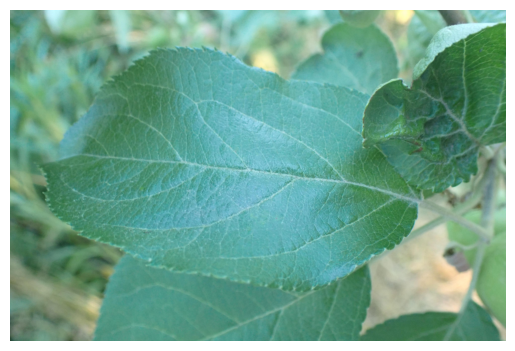

In [38]:
# User input for image path
image_path = input("Enter the path to the image file: ")

try:
    # Make predictions
    predicted_class_index, predictions = predict_image(image_path)
    
    # Get the predicted class name
    predicted_class = class_labels[predicted_class_index]
    
    # Output the results
    print(f"Predicted Class: {predicted_class}")
    print(f"Prediction Probabilities: {predictions}")

    # Display the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"An error occurred: {str(e)}")


In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to 'model.pkl'")